# Load dataset

In [1]:
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBClassifier
from xgboost import plot_tree
from matplotlib import pyplot
from IPython.display import display, HTML
from sklearn.externals import joblib
from sklearn.metrics import f1_score, precision_score, recall_score, make_scorer,log_loss, accuracy_score
from sklearn.cross_validation import cross_val_score,train_test_split, StratifiedKFold
import pickle
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
pd.set_option('display.max_rows', 500)


input_file = "/notebooks/data/ait_result_dataset.V37.csv"
output_file = "/notebooks/data/fa.filtered.csv"


df = pd.read_csv(input_file, header = 0)
display(df)

df=df.replace(np.nan,0)
numpy_array = df.as_matrix()
n_features=numpy_array.shape[1]
#X=numpy_array[:,0:n_features-1]
#y=numpy_array[:,n_features-1]

y=df['target'];
X=df.drop('target',axis=1);
#display(X)
print(X.shape)

commonPattern_amp_min  commonPattern_amp_max  commonPattern_amp_mean  \
0                  0.663206               0.943967                0.853477   
1                  0.441365               1.635962                0.850146   
2                  0.418268               0.713713                0.544943   
3                  0.971430               1.244230                1.138933   
4                  0.811306               1.301849                1.015880   
5                  0.389075               0.549303                0.502175   
6                  0.960231               1.164359                1.060895   
7                  0.533465               0.967272                0.820413   
8                  0.562488               1.014121                0.702822   
9                  0.546304               0.633997                0.590979   
10                 0.328695               0.505578                0.415668   
11                 0.683465               0.813874                0.742963   
12                 1.215266               1.389793                1.321660   
13                 1.132248               1.376174                1.238239   
14                 0.542763               2.162339                0.885911   
15                 1.145443               1.468748                1.299969   
16                 0.208730               0.379624                0.312416   
17                 0.299054               0.404489                0.353110   
18                 0.529524               1.001625                0.701764   
19                 0.397582               1.031480                0.577998   
20                 0.763203               0.856702                0.806492   
21                 0.210789               2.735723                0.403226   
22                 0.579054               0.997912                0.891399   
23                 0.683262               0.840175                0.770806   
24                 0.910757               1.245384                1.062847   
25                 0.742313               0.878976                0.815440   
26                 0.429475               0.713184                0.598680   
27                 1.080190               1.213285                1.142321   
28                 0.569593               0.689628                0.626621   
29                 0.333374               1.076611                0.767171   
30                 0.415879               0.632088                0.522287   
31                 0.386497               1.188174                0.911186   
32                 0.622598               0.818042                0.765118   
33                 0.558754               2.607147                0.936483   
34                 0.504172               0.755787                0.682418   
35                 0.675604               1.589276                0.768385   
36                 0.221584               0.512476                0.381201   
37                 0.880138               1.059937                0.956520   
38                 0.552233               3.238488                0.869027   
39                 0.485274               0.614980                0.554715   
40                 1.091640               2.640489                1.333853   
41                 1.415080               1.873132                1.717484   
42                 0.726713               0.888545                0.823447   
43                 2.763466               2.954082                2.855347   
44                 0.901487               1.052487                0.973941   
45                 0.793828               1.346368                1.046750   
46                 0.707280               0.926878                0.792706   
47                 0.808563               0.927531                0.865206   
48                 0.195162               0.460965                0.429245   
49                 2.152399               2.536936                2.329857   
50                 1.101376 

(8528, 386)


# Train classifier

In [95]:
params = {
    'objective': 'multi:softmax',
    'max_depth': 5,
    'learning_rate': 0.26046515748913901,
    'silent': 1,
    'n_estimators': 100,
    'nthread': 8,
    'colsample_bytree': 0.81958831684028921,
    'gamma':0.25,
    'subsample':0.93168572417786366,
    'min_child_weight':0.9,
    'colsample_bylevel':1,
    'max_delta_step':0,
    'missing':None,
    'reg_alpha':0
}
    
bst = XGBClassifier(**params).fit(X, y)
xgb_y_pred = bst.predict(X)



# Load classifier

In [2]:
bst = joblib.load('/notebooks/data/xgboost_joblib.pkl')

# Display feature importance as table

In [96]:
fi=pd.DataFrame(bst.feature_importances_)
fi.columns = ['Importance']
#display(fi)
cols=pd.DataFrame(list(X.columns))
cols.columns = ['Feature']
result = pd.concat( [fi, cols], axis=1)
display(result)

fi_sorted=result.sort_values(by='Importance', ascending=False)
display(fi_sorted)



Importance                                            Feature
0      0.003802                              commonPattern_amp_min
1      0.003666                              commonPattern_amp_max
2      0.002580                             commonPattern_amp_mean
3      0.004345                              commonPattern_amp_std
4      0.005160                           commonPattern_amp_median
5      0.004752                              commonPattern_amp_iqr
6      0.008282                             commonPattern_amp_gini
7      0.004073                            commonPattern_width_min
8      0.003259                            commonPattern_width_max
9      0.006246                           commonPattern_width_mean
10     0.005567                            commonPattern_width_std
11     0.004209                         commonPattern_width_median
12     0.002716                            commonPattern_width_iqr
13     0.005974                           commonPattern_width_gini
14     0.004345                              commonPattern_BCI_min
15     0.004888                              commonPattern_BCI_max
16     0.001629                             commonPattern_BCI_mean
17     0.003259                              commonPattern_BCI_std
18     0.001222                           commonPattern_BCI_median
19     0.004616                              commonPattern_BCI_iqr
20     0.002851                             commonPattern_BCI_gini
21     0.004616                                         P_corr_min
22     0.003938                                        P_rmsav_min
23     0.005974                                      P_rmszero_min
24     0.006925                                         P_corr_max
25     0.002851                                        P_rmsav_max
26     0.002716                                      P_rmszero_max
27     0.006246                                        P_corr_mean
28     0.002037                                       P_rmsav_mean
29     0.003259                                     P_rmszero_mean
30     0.003530                                         P_corr_std
31     0.002172                                        P_rmsav_std
32     0.001629                                      P_rmszero_std
33     0.007875                                      P_corr_median
34     0.003259                                     P_rmsav_median
35     0.003530                                   P_rmszero_median
36     0.005295                                         P_corr_iqr
37     0.003802                                        P_rmsav_iqr
38     0.004888                                      P_rmszero_iqr
39     0.001358                                        P_corr_gini
40     0.007196                                       P_rmsav_gini
41     0.003666                                     P_rmszero_gini
42     0.003666                                            QRS_min
43     0.006789                                            QRS_max
44     0.005703                                           QRS_mean
45     0.006110                                            QRS_std
46     0.006246                                         QRS_median
47     0.005024                                            QRS_iqr
48     0.003938                                           QRS_gini
49     0.006382                                           qrs_Gmax
50     0.002308                                         qrs_I_Gmax
51     0.006517                                           qrs_Gmin
52     0.002172                                         qrs_I_Gmin
53     0.003802                                    qrs_I_delta_G_D
54     0.000136                                      qrs_secondRun
55     0.009912                                             qrs_dd
56     0.002716                                      qrs_n_not_sel
57     0.005295                                        qrs_iqr_qrs
58     0.005974                                     

Importance                                            Feature
67     0.012356                                  beat_bci_skewness
381    0.012084                         combined_normalOrOther_new
55     0.009912                                             qrs_dd
275    0.009776                                   af_mean_atrialHR
61     0.009369                                     qrs_drift_mean
65     0.008418                                  beat_amp_skewness
287    0.008418                                          av_P_on_1
6      0.008282                             commonPattern_amp_gini
33     0.007875                                      P_corr_median
260    0.007468                                     af_medianPamp1
307    0.007468                                         av_T_amp_1
69     0.007468                                beat_width_skewness
383    0.007332                         combined_normalOrNoise_new
279    0.007196                                af_pp_irregularity2
40     0.007196                                       P_rmsav_gini
261    0.007196                                        af_iqrPamp1
349    0.007060                            remav_ampRatio_qrsBlank
352    0.006925                                       ws_ecgAmpMin
24     0.006925                                         P_corr_max
280    0.006925                                            af_AFEv
269    0.006789                               af_pp_irregularity21
43     0.006789                                            QRS_max
301    0.006789                                   av_ST_gradient_1
311    0.006789                                  av_QRS_t_on2off_1
71     0.006517                  cc_ratioSCsUniqueBeforeCorrection
51     0.006517                                           qrs_Gmin
49     0.006382                                           qrs_Gmax
225    0.006382                              rhythm_imbalance1_rel
46     0.006246                                         QRS_median
310    0.006246                                    av_P_skewness_1
59     0.006246                                  qrs_baseline_mean
9      0.006246                           commonPattern_width_mean
385    0.006246                              combined_otherOrNoise
277    0.006246                               af_atrial_hr_ratio50
27     0.006246                                        P_corr_mean
247    0.006110                                af_atrial_frequency
45     0.006110                                            QRS_std
347    0.006110                      remav_mean_amp_after_qrsBlank
375    0.005974                         combined_normalOrOther_old
384    0.005974                             combined_afOrOther_new
253    0.005974                                 af_p_af_freq_rel_3
23     0.005974                                      P_rmszero_min
58     0.005974                                      qrs_qrs_range
13     0.005974                           commonPattern_width_gini
346    0.005838                 remav_mean_amp_before_qrsBlank_rel
374    0.005838                             combined_normalOrOther
263    0.005838                                   af_iqr_atrialHR1
294    0.005838                                  av_P_amplitude2_1
265    0.005838                                  af_mean_atrialHR1
295    0.005838                               av_P_amplitude2rel_1
286    0.005703                                       av_QRS_off_1
289    0.005703                                     av_QRS_width_1
273    0.005703                                    af_iqr_atrialHR
44     0.005703                                           QRS_mean
60     0.005567                                   qrs_baseline_std
282    0.005567                                           af_IrrEv
376    0.005567                                 combined_afOrNoise
10     0.005567                            commonPattern_width_std
345    0.005567                     remav_mean_amp_b

# Plot feature importance

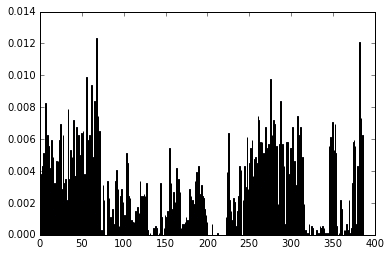

In [97]:
pyplot.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
pyplot.show()

# Drop columns where feature importance=0

In [84]:
fi_idx=fi.loc[fi['Importance'] == 0]

In [85]:
len(fi_idx)

44

In [86]:
cols=list(df.columns)
cols_to_drop=[]
for i in range(1,len(fi_idx)):
    cols_to_drop.append(cols[i])


In [91]:
print(cols_to_drop)
jolib.dump(cols_to_drop)

['commonPattern_amp_max', 'commonPattern_amp_mean', 'commonPattern_amp_std', 'commonPattern_amp_median', 'commonPattern_amp_iqr', 'commonPattern_amp_gini', 'commonPattern_width_min', 'commonPattern_width_max', 'commonPattern_width_mean', 'commonPattern_width_std', 'commonPattern_width_median', 'commonPattern_width_iqr', 'commonPattern_width_gini', 'commonPattern_BCI_min', 'commonPattern_BCI_max', 'commonPattern_BCI_mean', 'commonPattern_BCI_std', 'commonPattern_BCI_median', 'commonPattern_BCI_iqr', 'commonPattern_BCI_gini', 'P_corr_min', 'P_rmsav_min', 'P_rmszero_min', 'P_corr_max', 'P_rmsav_max', 'P_rmszero_max', 'P_corr_mean', 'P_rmsav_mean', 'P_rmszero_mean', 'P_corr_std', 'P_rmsav_std', 'P_rmszero_std', 'P_corr_median', 'P_rmsav_median', 'P_rmszero_median', 'P_corr_iqr', 'P_rmsav_iqr', 'P_rmszero_iqr', 'P_corr_gini', 'P_rmsav_gini', 'P_rmszero_gini', 'QRS_min', 'QRS_max']


NameError: name 'pickle' is not defined

In [88]:
df = df.drop(cols_to_drop, axis = 1)

In [89]:
print(df.shape)

(8528, 344)


# Data export

In [90]:
df.to_csv(output_file, index=False)

# Predict and evaluate

In [79]:
xgb_y_pred = bst.predict(X)

print("F1: {:1.4f}".format(f1_score(y, xgb_y_pred,labels=['A','O','N'],average='macro')))  

#display(pd.DataFrame(xgb_y_pred))
correct = 0

for i in range(len(xgb_y_pred)):
    if (y[i] == xgb_y_pred[i]):
        correct += 1
acc = accuracy_score(y, xgb_y_pred)
print('Predicted correctly: {0}/{1}'.format(correct, len(xgb_y_pred)))
print('Error: {0:.4f}'.format(1-acc))
#joblib.dump(bst, 'xgboost.pkl', compress = 1)
scorer = make_scorer(f1_score, labels=['A','O','N'], average='macro')
scores = cross_val_score(bst, X, y, cv=5,scoring=scorer)
print("F1 scores 5-fold CV:",scores)
print("F1 mean 5-fold CV:",np.mean(scores))
joblib.dump(scores, 'scores.pkl', compress = 1)

F1: 1.0000
Predicted correctly: 8528/8528
Error: 0.0000
F1 scores 5-fold CV: [ 0.84069658  0.84759787  0.84353029  0.80940448  0.83878291]
F1 mean 5-fold CV: 0.836002426544


['scores.pkl']

# Plot tree

In [107]:
plot_tree(bst)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(250, 200)
fig.savefig('tree.png')

# Random Forest